In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
from scipy.stats import linregress
import cartopy.crs as ccrs
import seaborn as sns
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
import matplotlib.colors as mcolors

In [87]:
data = pd.read_excel('lat lons for picarro sedi.xlsx')
print(data['lat'])


0     42.022933
1     37.156550
2     40.934483
3     49.144033
4     57.033283
5     59.753533
6     62.923333
7     64.954033
8     67.006300
9     76.856700
10    77.233000
11    63.053917
Name: lat, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Text(0.5, 1.0, 'Atlantic Sediment Core Stations')

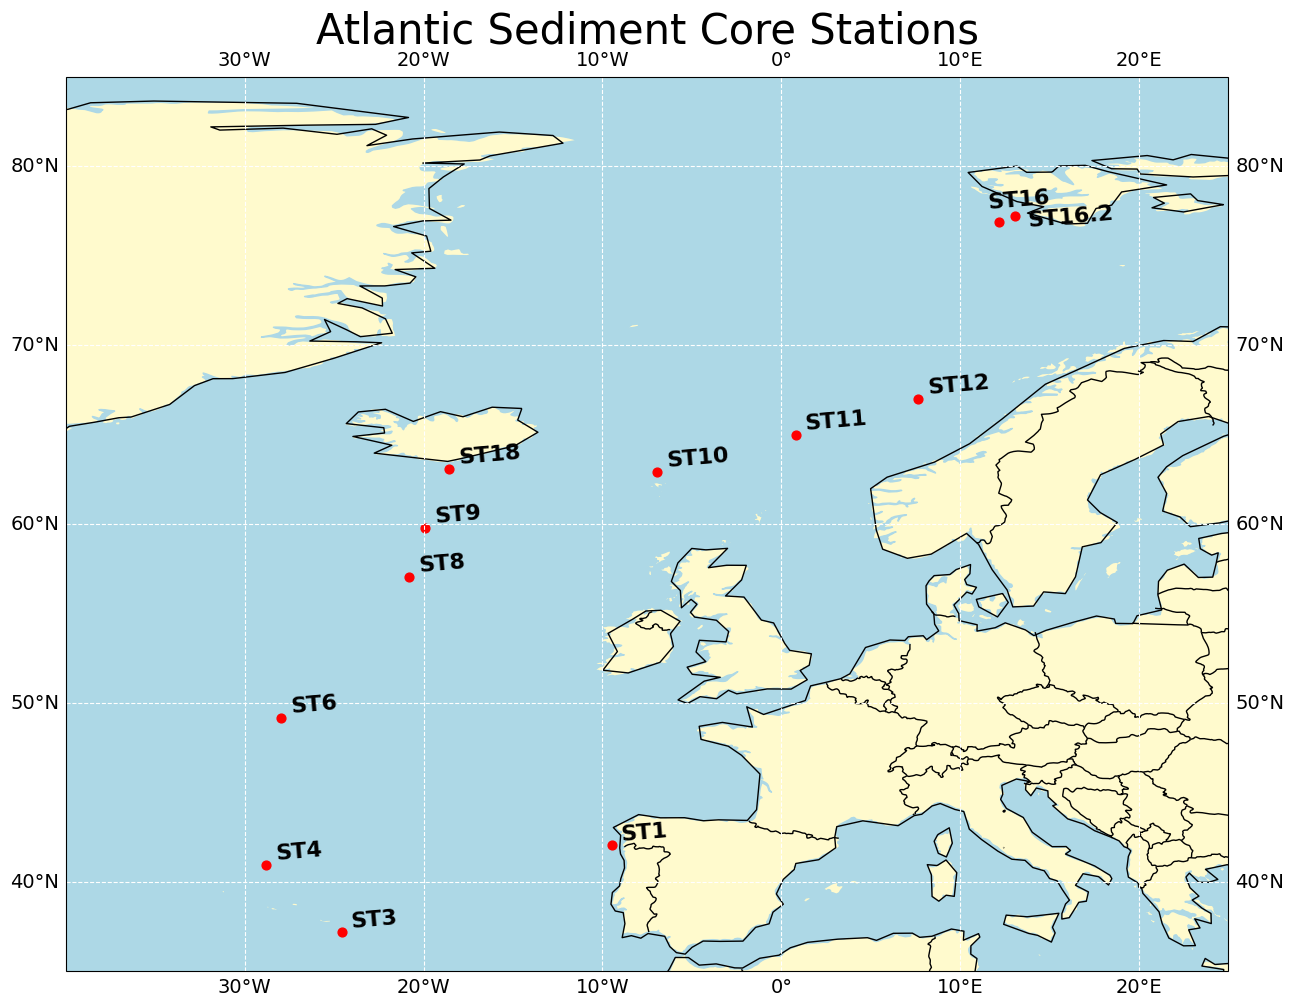

In [89]:
#map 
#lat and lon 
lat = data['lat']
lon = data['lon']

#import for lat and lon
fig= plt.figure(num=None, figsize=(15,15))
plt.rcParams.update({'font.size': 14})
#setting lat and lon bounds

ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-40, 25, 35, 85], crs=ccrs.PlateCarree())
ax.coastlines(resolution = '110m', color='black')
ax.add_feature(cfeature.LAND, color='lemonchiffon')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.BORDERS, color='black')

#couldnt get lat and lon lines to show up and used https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html for help
g1= ax.gridlines(crs=ccrs.PlateCarree(),color='white',linestyle='--',alpha=1,draw_labels=True)
g1.xlabels_top= False
g1.ylabels_right=False
g1.xformatter= LONGITUDE_FORMATTER
g1.yformatter= LATITUDE_FORMATTER
plt.scatter(lon,lat,transform=ccrs.PlateCarree(), color = 'red', s =40)

# #label the sites 
# for idx, row in data.iterrows():
#     if idx == 10:  # 11th row (since Python uses 0-based indexing)
#         ha_value = 'left'
#     else:
#         ha_value = 'right'
#     plt.text(row["lon"], row["lat"], row["sample id"], 
#              transform=ccrs.PlateCarree(), fontsize=20, color='black', ha=ha_value)
#label stations with offsets
for i, (lon, lat, name) in enumerate(zip(station_lons, station_lats, station_id)):
    dx = 0.5 
    dy = 0.3 
     # Special case for overlapping stations ST16 and ST16.2
    if name == 'ST16':
        dx, dy = -0.7, 0.8  # move slightly left and up
    elif name == 'ST16.2':
        dx, dy = 0.7, -0.6  # move slightly right and down
    ax.text(lon + dx, lat + dy, name, fontsize=16, fontweight="bold",
            transform=ccrs.PlateCarree(), color="black", zorder=4, rotation = 5)
    
#title for map
plt.title('Atlantic Sediment Core Stations', fontsize = 30)

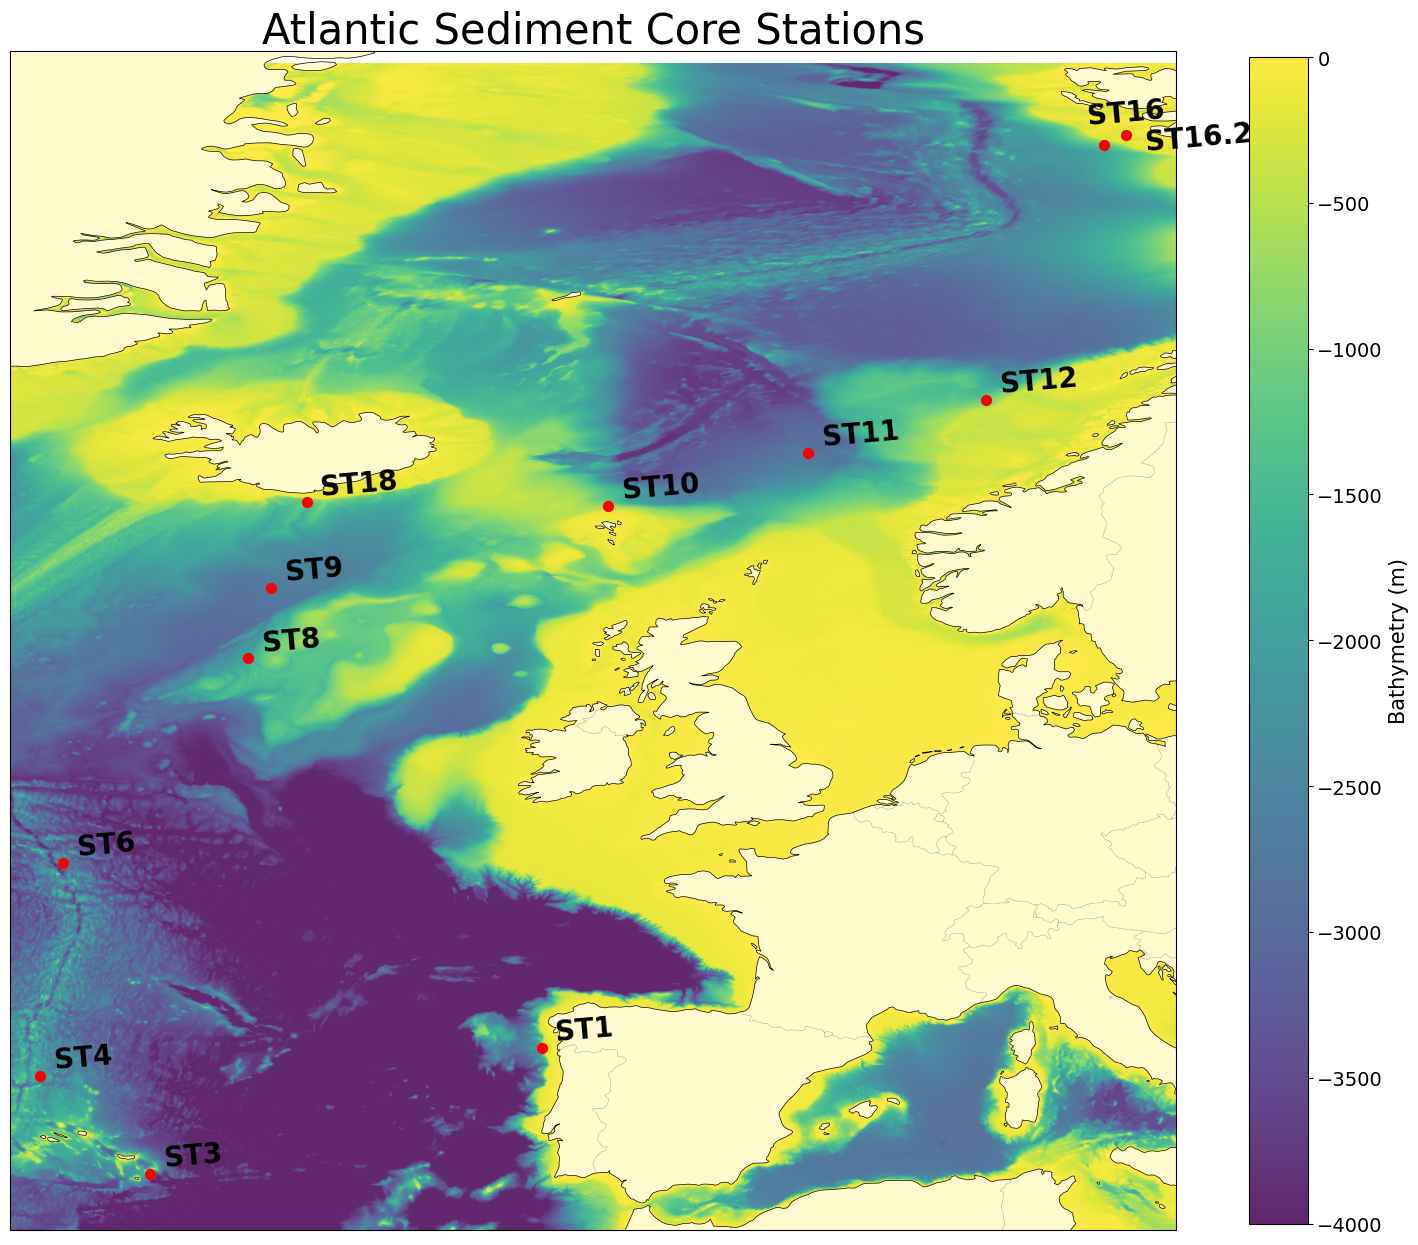

In [91]:
#map 2: Bathymetry Map for ATL Bulk SED

#open dataset
ds = xr.open_dataset("GEBCO_2025.nc", mask_and_scale=True)

#index bathymetry data
da = ds["elevation"]

#data correct orientation for imshow
data = np.flipud(da_subset.values)

# map extent in increasing order
extent = [float(da_subset.lon.min()),float(da_subset.lon.max()), float(da_subset.lat.min()),float(da_subset.lat.max())]

#create map
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

# add base map features for land color
ax.add_feature(cfeature.LAND, facecolor="lemonchiffon", zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.3, zorder=2)

# plot bathymetry
im = ax.imshow(
    data,
    origin="upper",  # 'upper' ensures north is up
    extent=extent,
    transform=ccrs.PlateCarree(),
    cmap='viridis',
    vmin=-4000,
    vmax=0,
    alpha=0.85,
    zorder=0
)

#color bar
cbar = plt.colorbar(im, ax=ax, orientation="vertical", shrink=0.8)
cbar.set_label("Bathymetry (m)", fontsize=15)

# station coordinates
station_lons = [-9.49435,-24.59206667,-28.83935,-27.95233333,-20.824,-19.92153333,
                -6.939433333,0.793233333,7.649933333,12.19845,13.0616,-18.55646667]  
station_lats = [42.02293333,37.15655,40.93448333,49.14403333,57.03328333,59.75353333,
                62.92333333,64.95403333,67.0063,76.8567,77.233,63.05391667]
#station id
station_id = ['ST1','ST3','ST4','ST6','ST8','ST9','ST10','ST11','ST12','ST16','ST16.2','ST18']

#plot stations
ax.scatter(station_lons, station_lats, color="red", s=50, transform=ccrs.PlateCarree(), zorder=3)

#label stations with offsets
for i, (lon, lat, name) in enumerate(zip(station_lons, station_lats, station_id)):
    dx = 0.5 
    dy = 0.3 
     # Special case for overlapping stations ST16 and ST16.2
    if name == 'ST16':
        dx, dy = -0.7, 0.8  # move slightly left and up
    elif name == 'ST16.2':
        dx, dy = 0.7, -0.6  # move slightly right and down
    ax.text(lon + dx, lat + dy, name, fontsize=20, fontweight="bold",
            transform=ccrs.PlateCarree(), color="black", zorder=4, rotation = 5)

# final formatting code
ax.set_extent(extent)
ax.set_title("Atlantic Sediment Core Stations", fontsize=30)
plt.tight_layout()
plt.show()

